antes:
[[0.65224712]
 [0.56189419]
 [0.51938552]
 [0.46320181]
 [0.60343779]
 [0.54465008]
 [0.49328514]
 [0.46719839]]
despues: 
  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


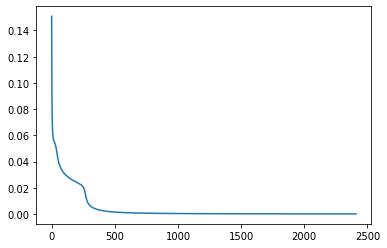

In [31]:
import numpy as np
import matplotlib.pyplot as plt

inputs=np.array([[0,0,0,1],
                 [0,0,1,1],
                 [0,1,0,1],
                 [0,1,1,1],
                 [1,0,0,1],
                 [1,0,1,1],
                 [1,1,0,1],
                 [1,1,1,1]])#entradas

y=np.array([[0],[0],[0],[0],[0],[0],[0],[1]]) #Salidas

class NeuralNet():
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size
        'Pesos asociados a las capas ocultas y de salidas'
        self.w1=np.random.randn(self.input_size, self.hidden_size)
        self.w2=np.random.randn(self.hidden_size, self.output_size)

    def forward(self, x):
        self.z1=np.dot(x, self.w1)
        self.a1=self.sigmoide(self.z1)
        self.z2=np.dot(self.a1, self.w2)
        self.output=self.sigmoide(self.z2)
        return self.output

    def backpropagation(self, x,y,lr):
        output=self.forward(x)
        error_out=output-y
        delta_out=error_out * self.sigmoide_der(output)
        derivative_w2=np.dot(self.a1.T,delta_out)
        error_hidden=np.dot(delta_out,self.w2.T)
        delta_hidden=error_hidden * self.sigmoide_der(self.a1)
        derivative_w1=np.dot(inputs.T,delta_hidden)

        #gradiente descendiente
        self.w2-=derivative_w2*lr
        self.w1-=derivative_w1*lr
        return self.mse(output, y)

    def sigmoide(self, x):
        return 1/(1+np.exp(-x))

    def sigmoide_der(self, x):
        return x*(1-x)

    #promedio
    def mse(self, output, target):
        return np.mean((output-target)**2)/2

'objecto'
nn=NeuralNet(4,4,1)

print("antes:")
print(nn.forward(inputs))

'Entrenamiento'
errors=[]
error=1
while error>0.0001:
    error=nn.backpropagation(inputs,y, 1)
    errors.append(error)

'Redondear val'
Out = nn.forward(inputs)
for i in range(np.size(Out)):

    if Out[i] < 0.5:
      Out[i] = 0
    else: Out[i] = 1

print("despues: \n ", Out)

'plot'
x_axis=range(0, len(errors))
plt.plot(x_axis, errors)
plt.show()

